# Notebook to run basic analysis on heart data based on disease collected from 'CellxGene' 

**Developed by** :Srivalli Kolla

**Created on** : 27 June, 2024

**Last modified** : 27 June, 2024

**Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

# Import packages

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import torch
from statsmodels.robust.scale import mad as median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

In [2]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
else :
    device = torch.device('cpu')

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.3.0
appnope             0.1.4
asttokens           NA
cffi                1.16.0
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0
debugpy             1.8.1
decorator           5.1.1
defusedxml          0.7.1
django              5.0.6
executing           2.0.1
h5py                3.10.0
igraph              0.10.8
ipykernel           6.29.3
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.42.0
louvain             0.8.1
matplotlib          3.8.3
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numpy               1.26.4
packaging           24.0
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
pickleshare         0.7.5
pkg_resources       NA
platformdirs        4.2.2
plotly              5.21.0
prompt_too

# Data loading

In [6]:
heart_adata = sc.read_h5ad('data/cg_heart_all_tissue.h5ad')
heart_adata

AnnData object with n_obs × n_vars = 3629952 × 1035
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'

In [ ]:
heart_adata.obs

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
0,2517346,d567b692-c374-4628-a508-8008f6778f22,10x 3' v2,EFO:0009899,endothelial cell,CL:0000115,sixth decade human stage,HsapDv:0000240,normal,PATO:0000461,...,cell,apex of heart,UBERON:0002098,heart,UBERON:0000948,7123.0,2467,2.887313,62.875374,31071
1,2517347,d567b692-c374-4628-a508-8008f6778f22,10x 3' v2,EFO:0009899,mural cell,CL:0008034,sixth decade human stage,HsapDv:0000240,normal,PATO:0000461,...,cell,apex of heart,UBERON:0002098,heart,UBERON:0000948,6091.0,2054,2.965433,282.782536,31071
2,2517348,d567b692-c374-4628-a508-8008f6778f22,10x 3' v2,EFO:0009899,endothelial cell,CL:0000115,sixth decade human stage,HsapDv:0000240,normal,PATO:0000461,...,cell,apex of heart,UBERON:0002098,heart,UBERON:0000948,6248.0,2426,2.575433,44.868741,31071
3,2517349,d567b692-c374-4628-a508-8008f6778f22,10x 3' v2,EFO:0009899,mural cell,CL:0008034,sixth decade human stage,HsapDv:0000240,normal,PATO:0000461,...,cell,apex of heart,UBERON:0002098,heart,UBERON:0000948,5862.0,1819,3.222650,94.875042,31071
4,2517350,d567b692-c374-4628-a508-8008f6778f22,10x 3' v2,EFO:0009899,endothelial cell,CL:0000115,sixth decade human stage,HsapDv:0000240,normal,PATO:0000461,...,cell,apex of heart,UBERON:0002098,heart,UBERON:0000948,4920.0,2330,2.111588,23.759119,31071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629947,62887152,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,endothelial cell,CL:0000115,11th week post-fertilization human stage,HsapDv:0000048,normal,PATO:0000461,...,cell,heart,UBERON:0000948,heart,UBERON:0000948,560.0,402,1.393035,2.174315,26454
3629948,62887153,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,endothelial cell,CL:0000115,11th week post-fertilization human stage,HsapDv:0000048,normal,PATO:0000461,...,cell,heart,UBERON:0000948,heart,UBERON:0000948,758.0,515,1.471845,2.724400,26454
3629949,62887154,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,endothelial cell,CL:0000115,11th week post-fertilization human stage,HsapDv:0000048,normal,PATO:0000461,...,cell,heart,UBERON:0000948,heart,UBERON:0000948,568.0,414,1.371981,1.648220,26454
3629950,62887155,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,endothelial cell,CL:0000115,11th week post-fertilization human stage,HsapDv:0000048,normal,PATO:0000461,...,cell,heart,UBERON:0000948,heart,UBERON:0000948,418.0,300,1.393333,2.312999,26454


In [ ]:
heart_adata.var

,soma_joinid,feature_id,feature_name,feature_length,nnz,n_measured_obs
feature_name,,,,,,
ABCA1,37,ENSG00000165029,ABCA1,11343,9001659,62902272
ABCA10,38,ENSG00000154263,ABCA10,8405,11705270,62845653
ABCA12,40,ENSG00000144452,ABCA12,9614,976134,60881315
ABCA9-AS1,51,ENSG00000231749,ABCA9-AS1,2990,2783190,55808577
ABCB4,55,ENSG00000005471,ABCB4,7728,1112933,62817959
...,...,...,...,...,...,...
RP11-103J8.1,43728,ENSG00000270792,RP11-103J8.1,2623,2109618,55288866
AC007193.10,44236,ENSG00000269124,AC007193.10,472,1045514,49989821
SGSM3-AS1,44515,ENSG00000229999,SGSM3-AS1,893,3074526,55144540


# Data Visualization

## Highly expressed genes across diseases

In [ ]:
heart_adata.obs.disease.unique()

['normal', 'myocardial infarction', 'dilated cardiomyopathy', 'arrhythmogenic right ventricular cardiomyopathy', 'non-compaction cardiomyopathy']
Categories (5, object): ['arrhythmogenic right ventricular cardiomyopathy', 'dilated cardiomyopathy', 'myocardial infarction', 'non-compaction cardiomyopathy', 'normal']

normal
normalizing counts per cell
    finished (0:00:01)


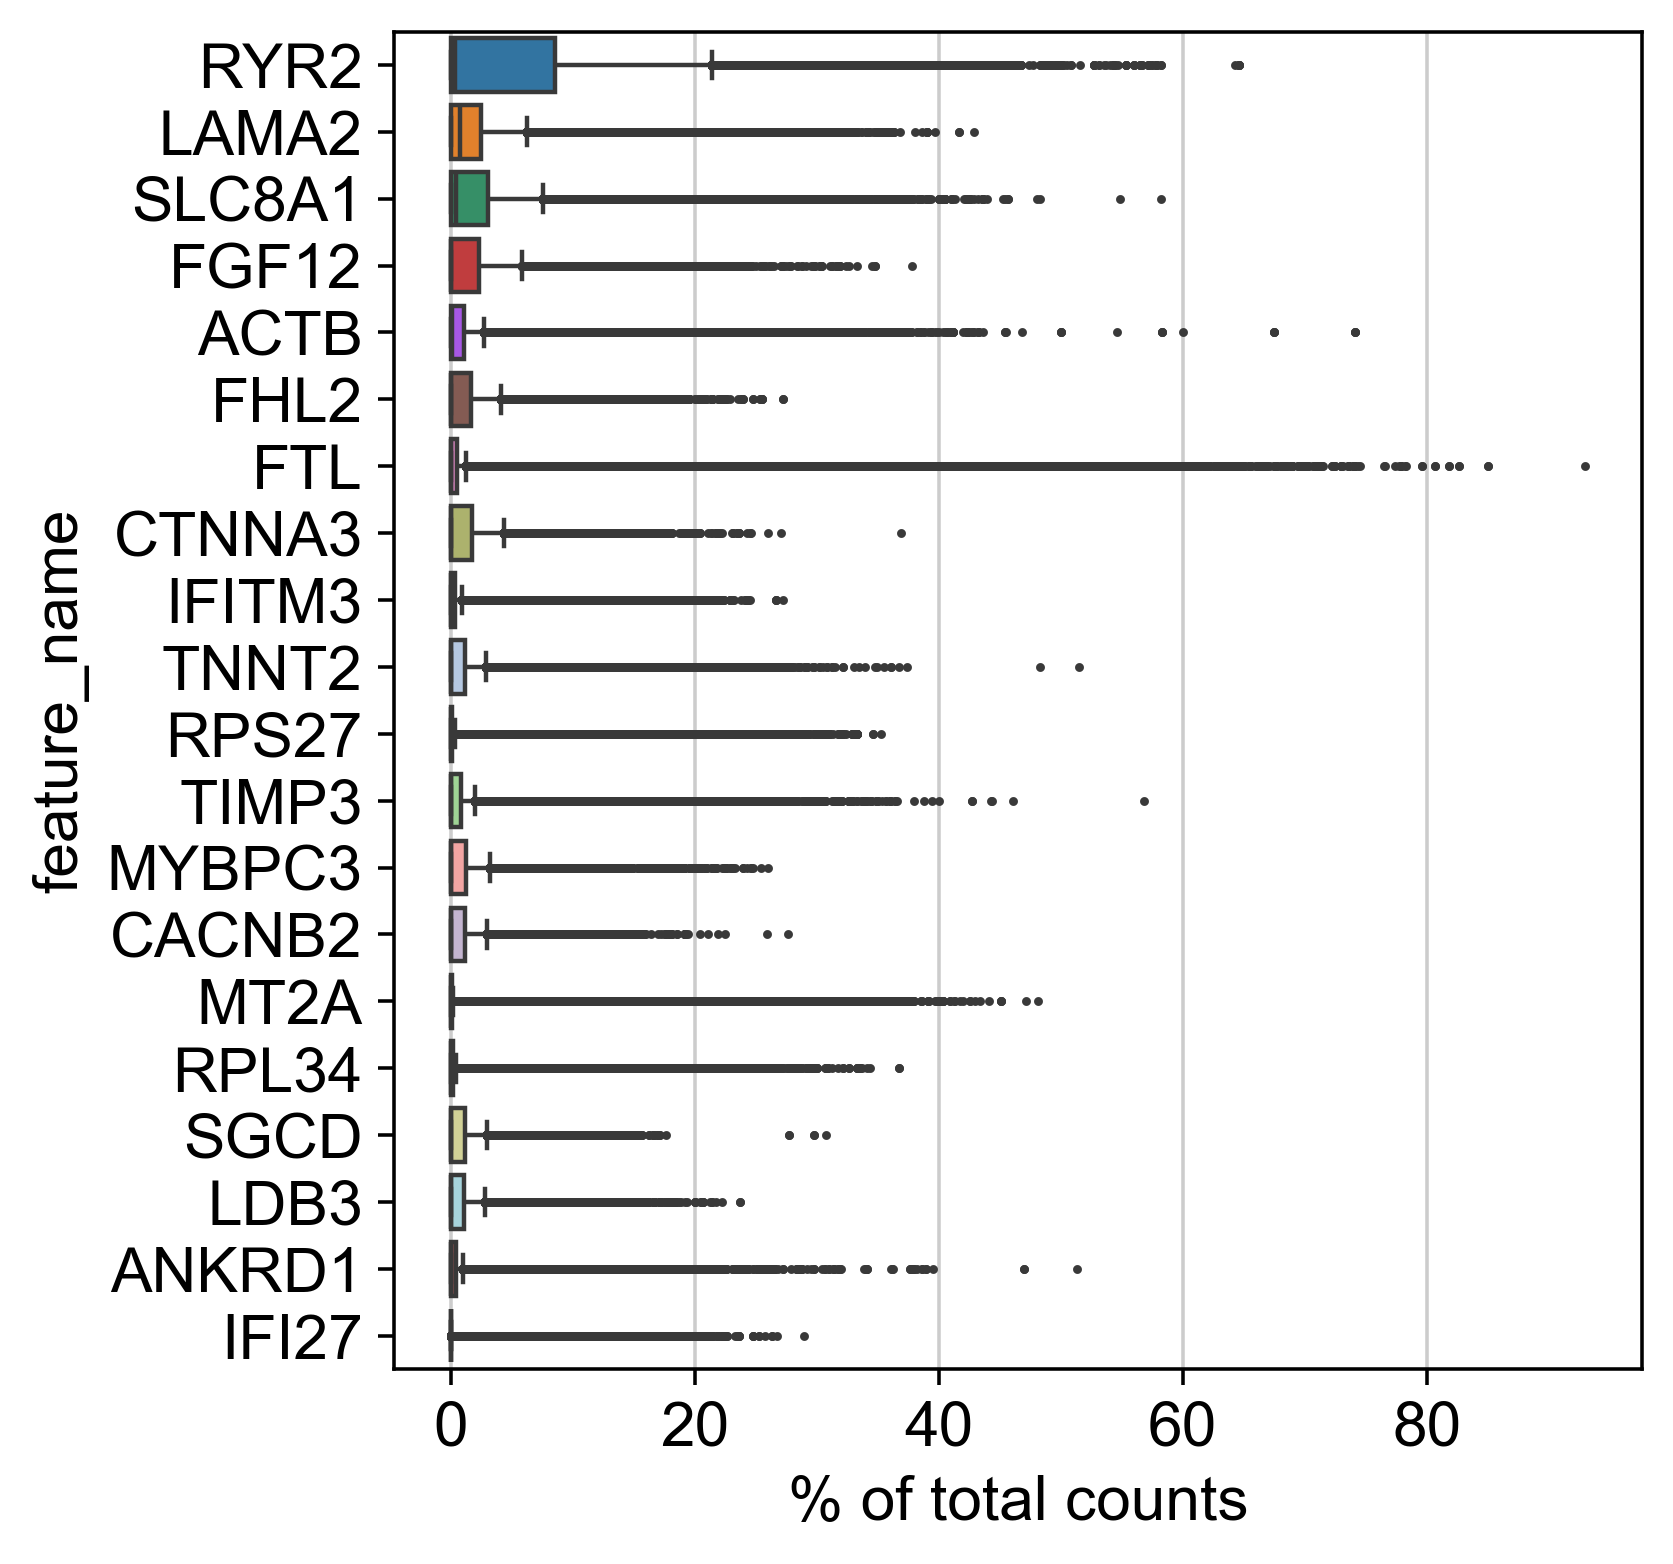

myocardial infarction
normalizing counts per cell
    finished (0:00:00)


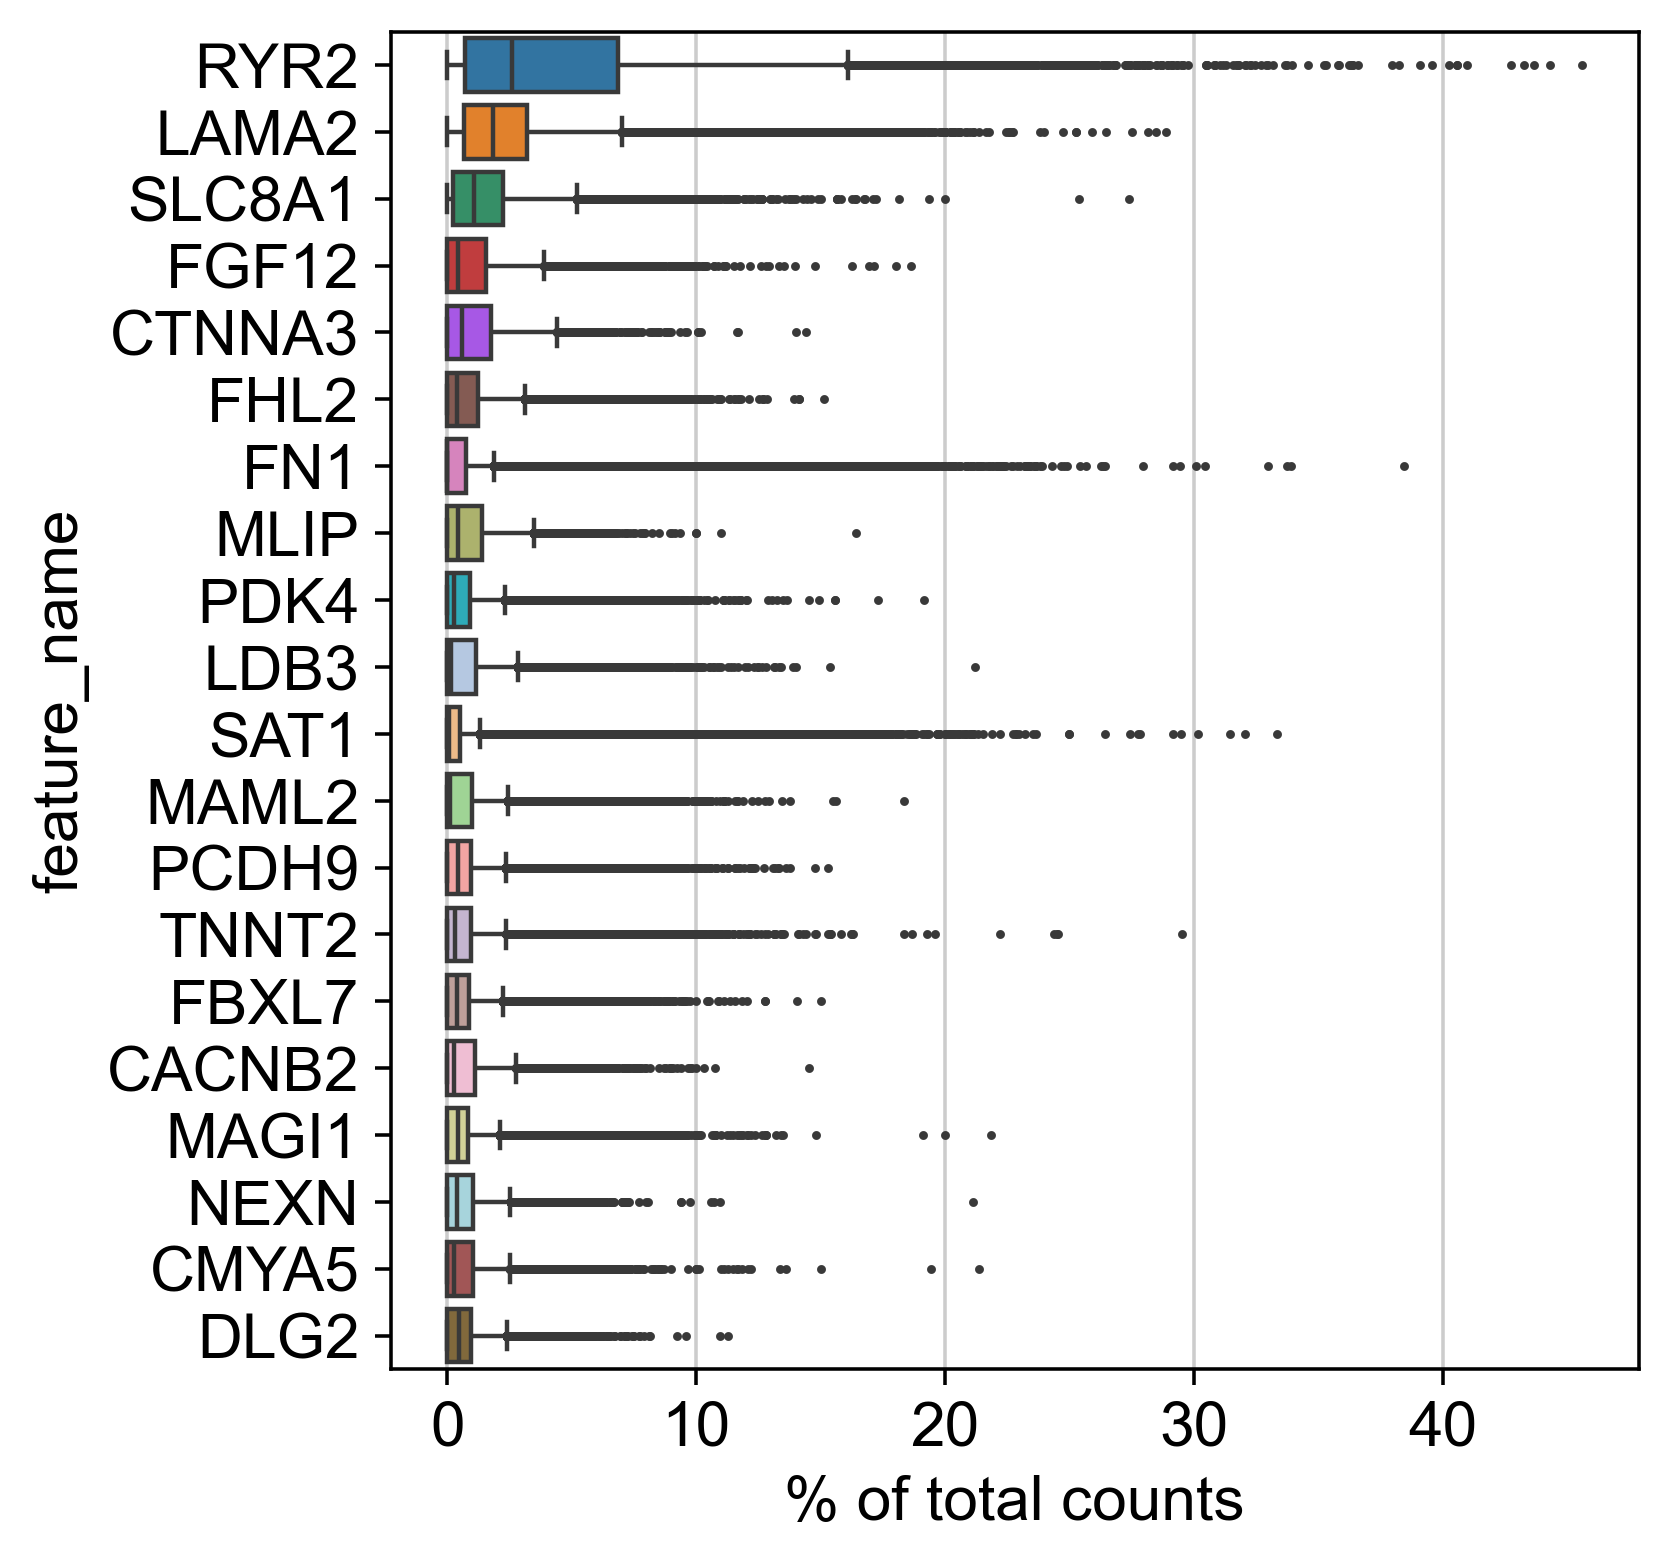

dilated cardiomyopathy
normalizing counts per cell
    finished (0:00:00)


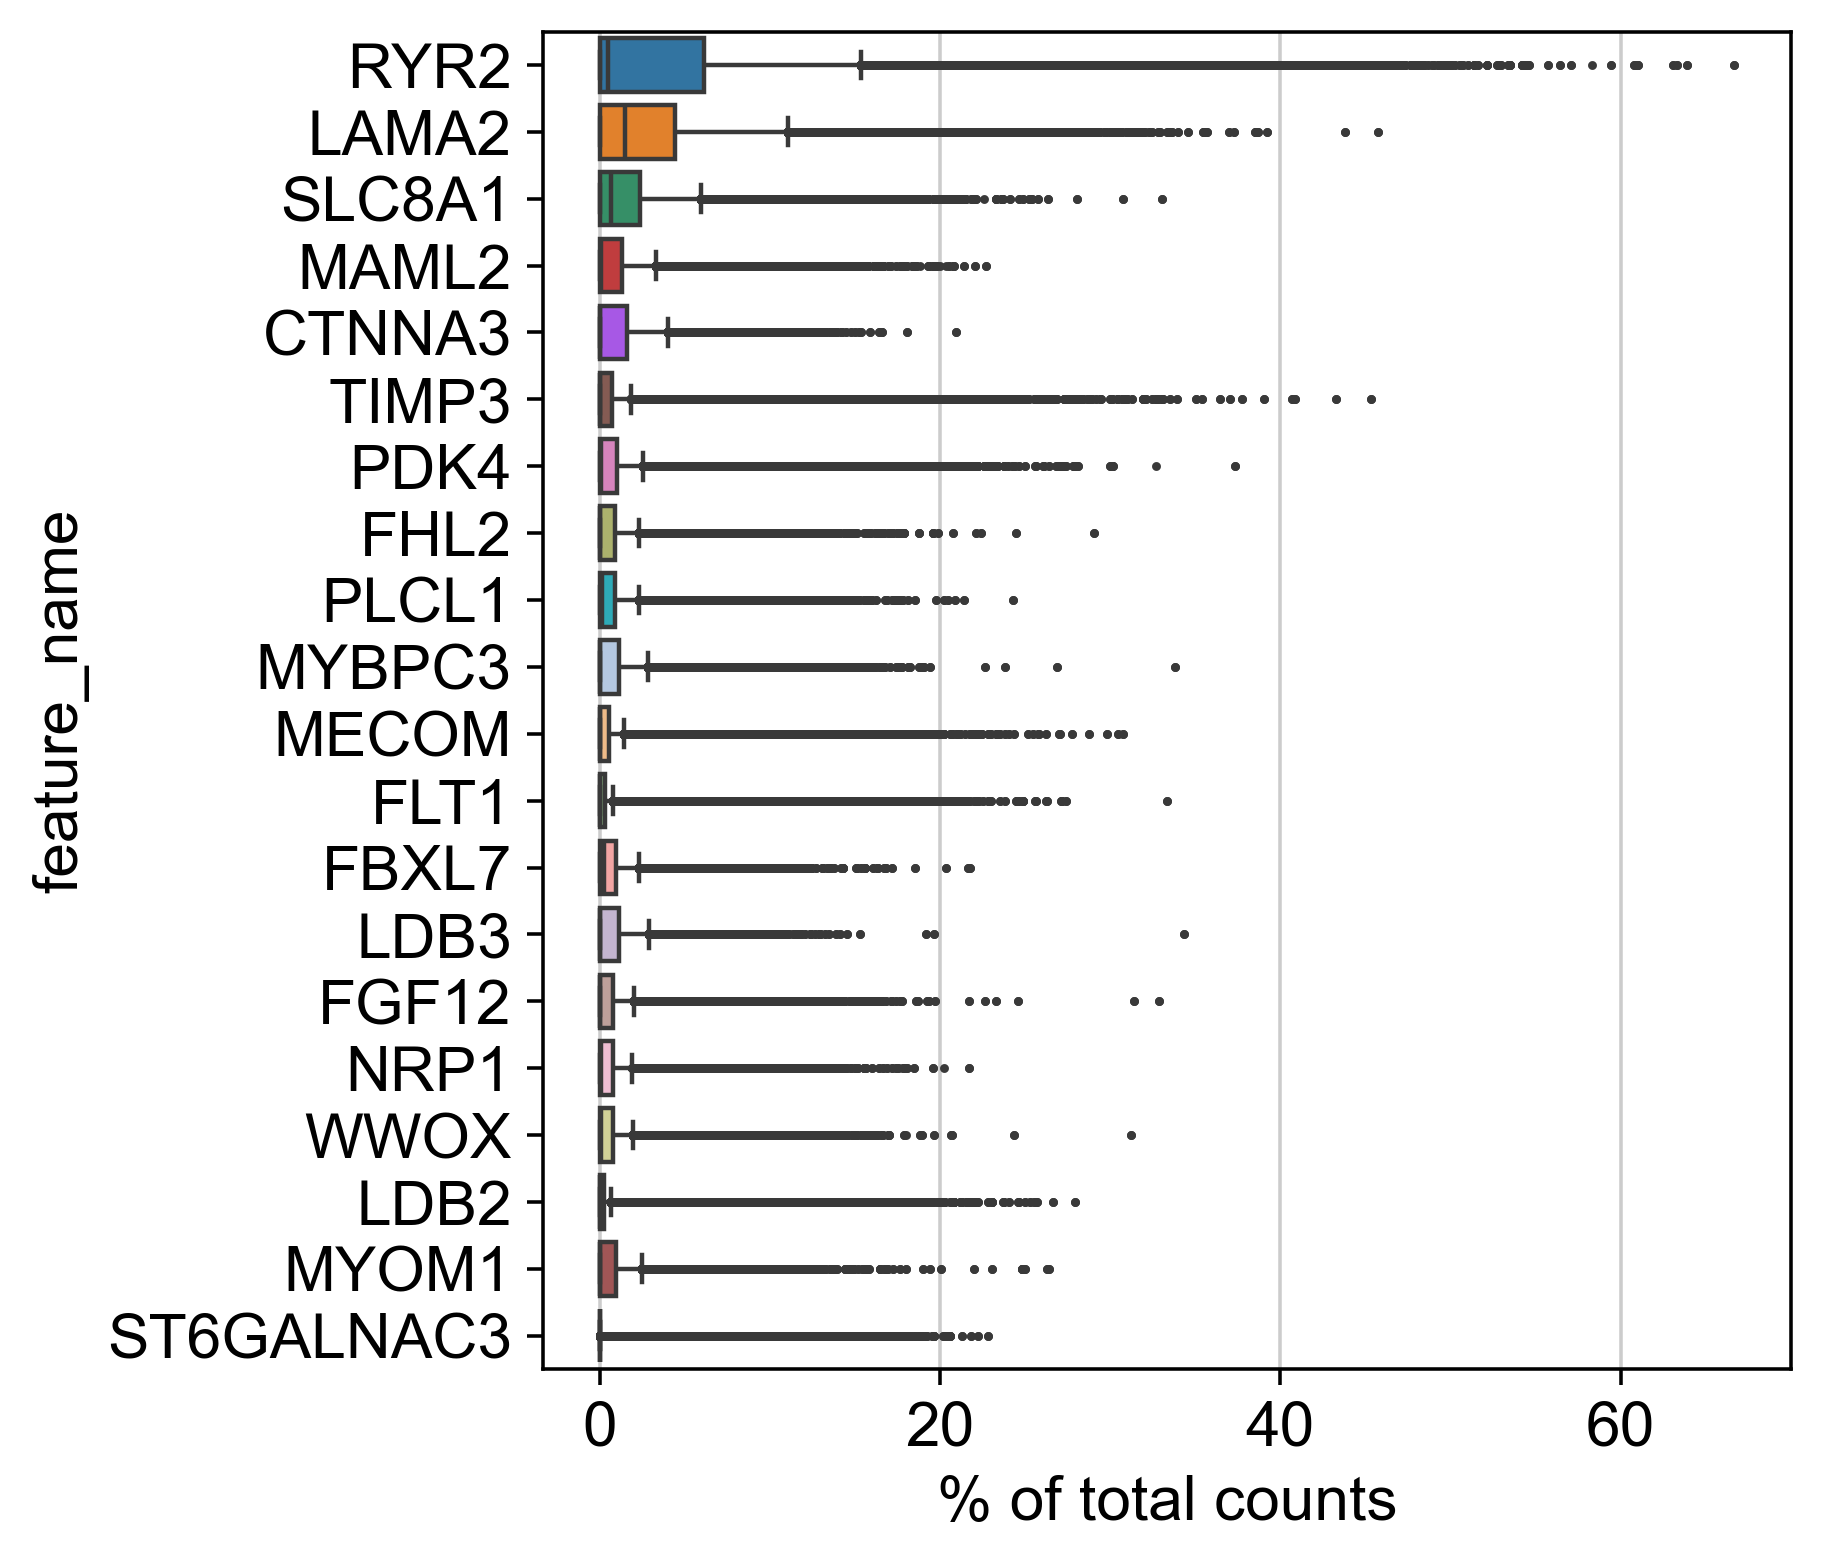

arrhythmogenic right ventricular cardiomyopathy
normalizing counts per cell
    finished (0:00:00)


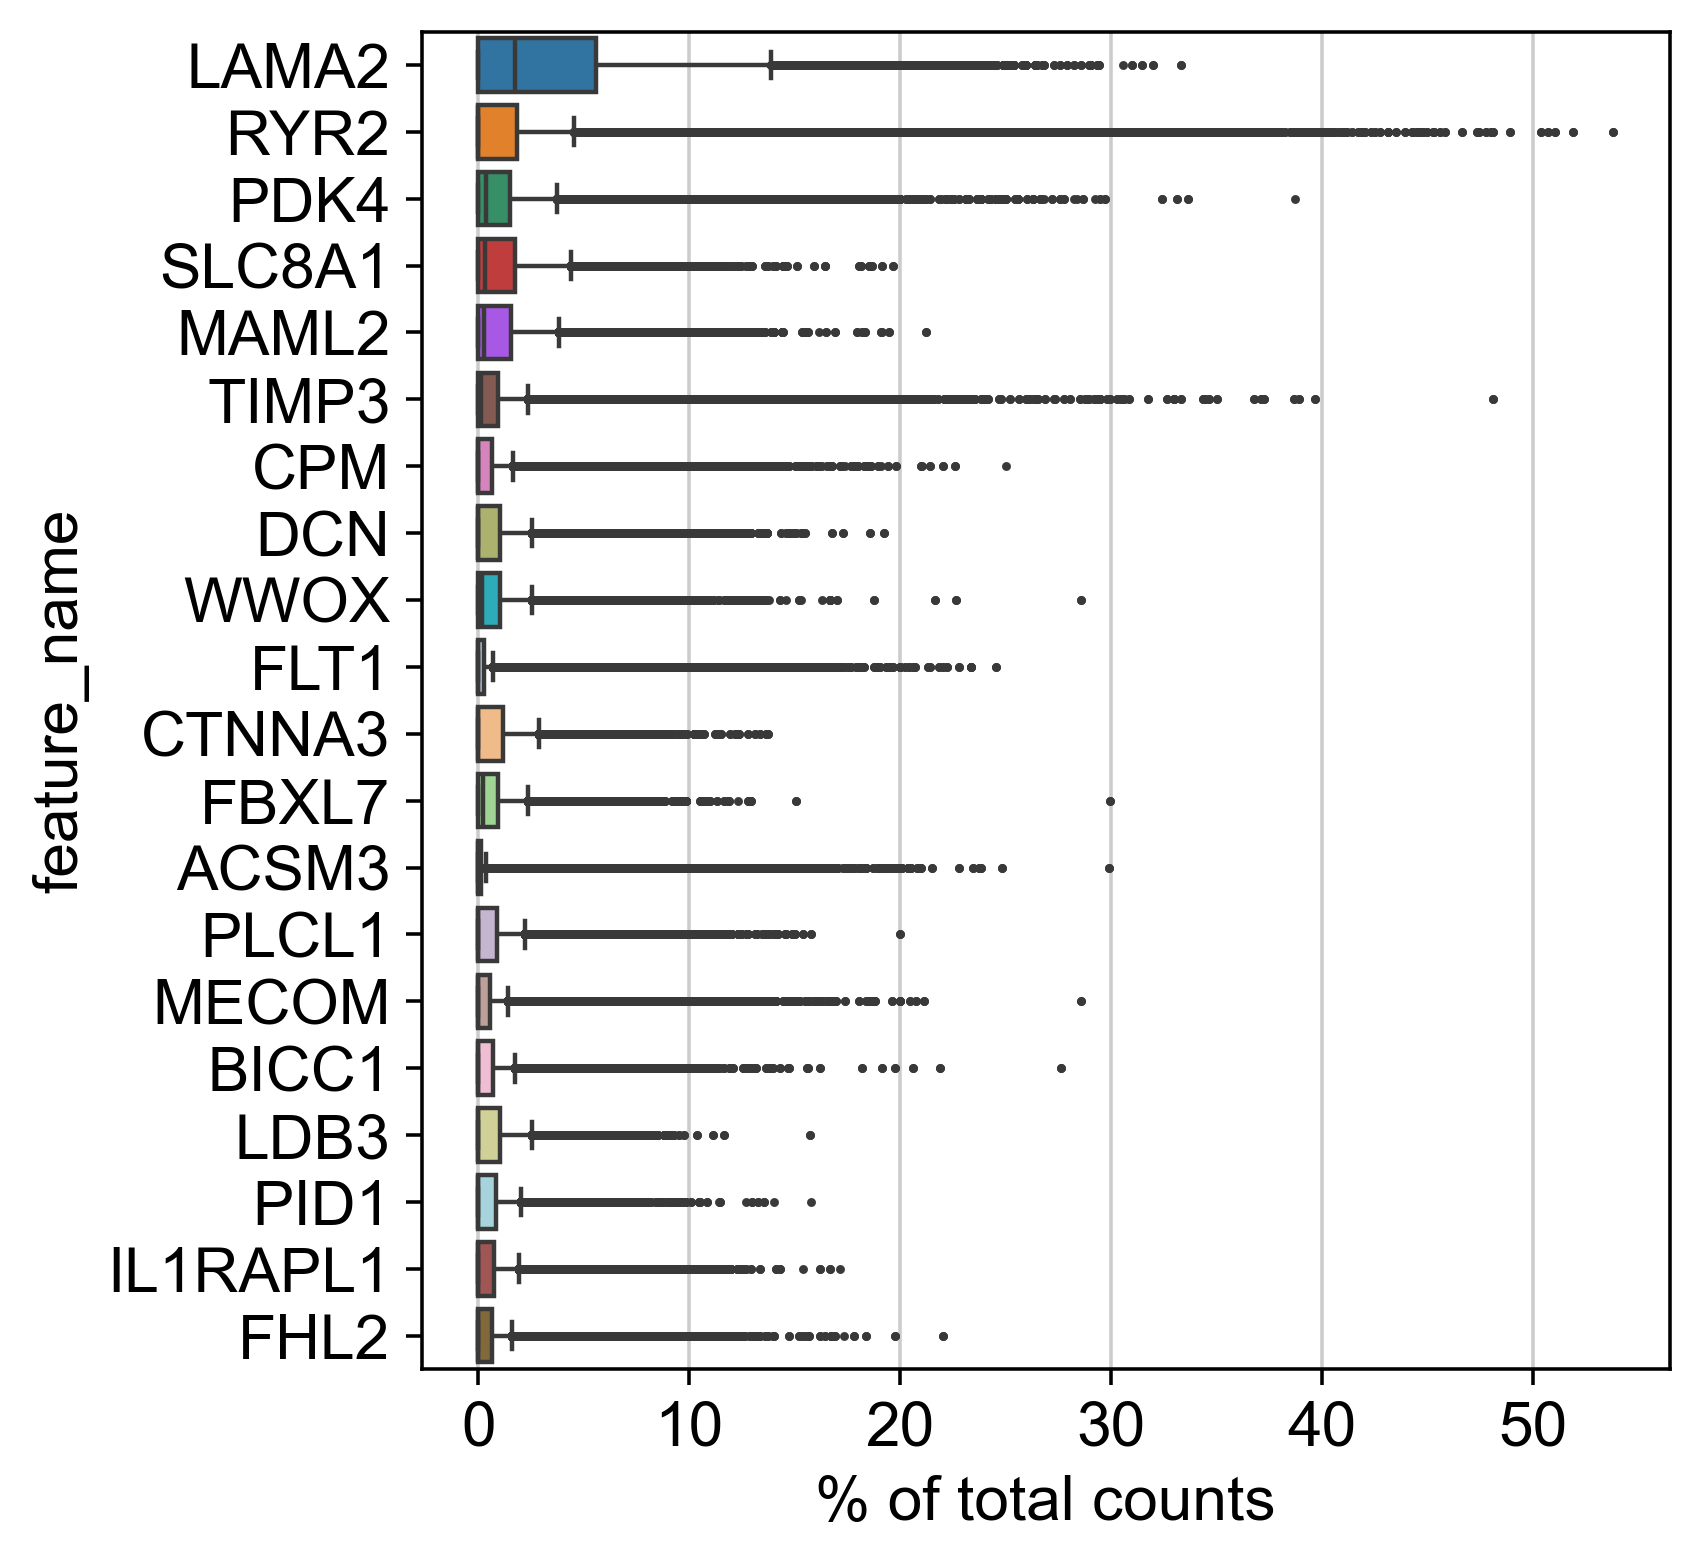

non-compaction cardiomyopathy
normalizing counts per cell
    finished (0:00:00)


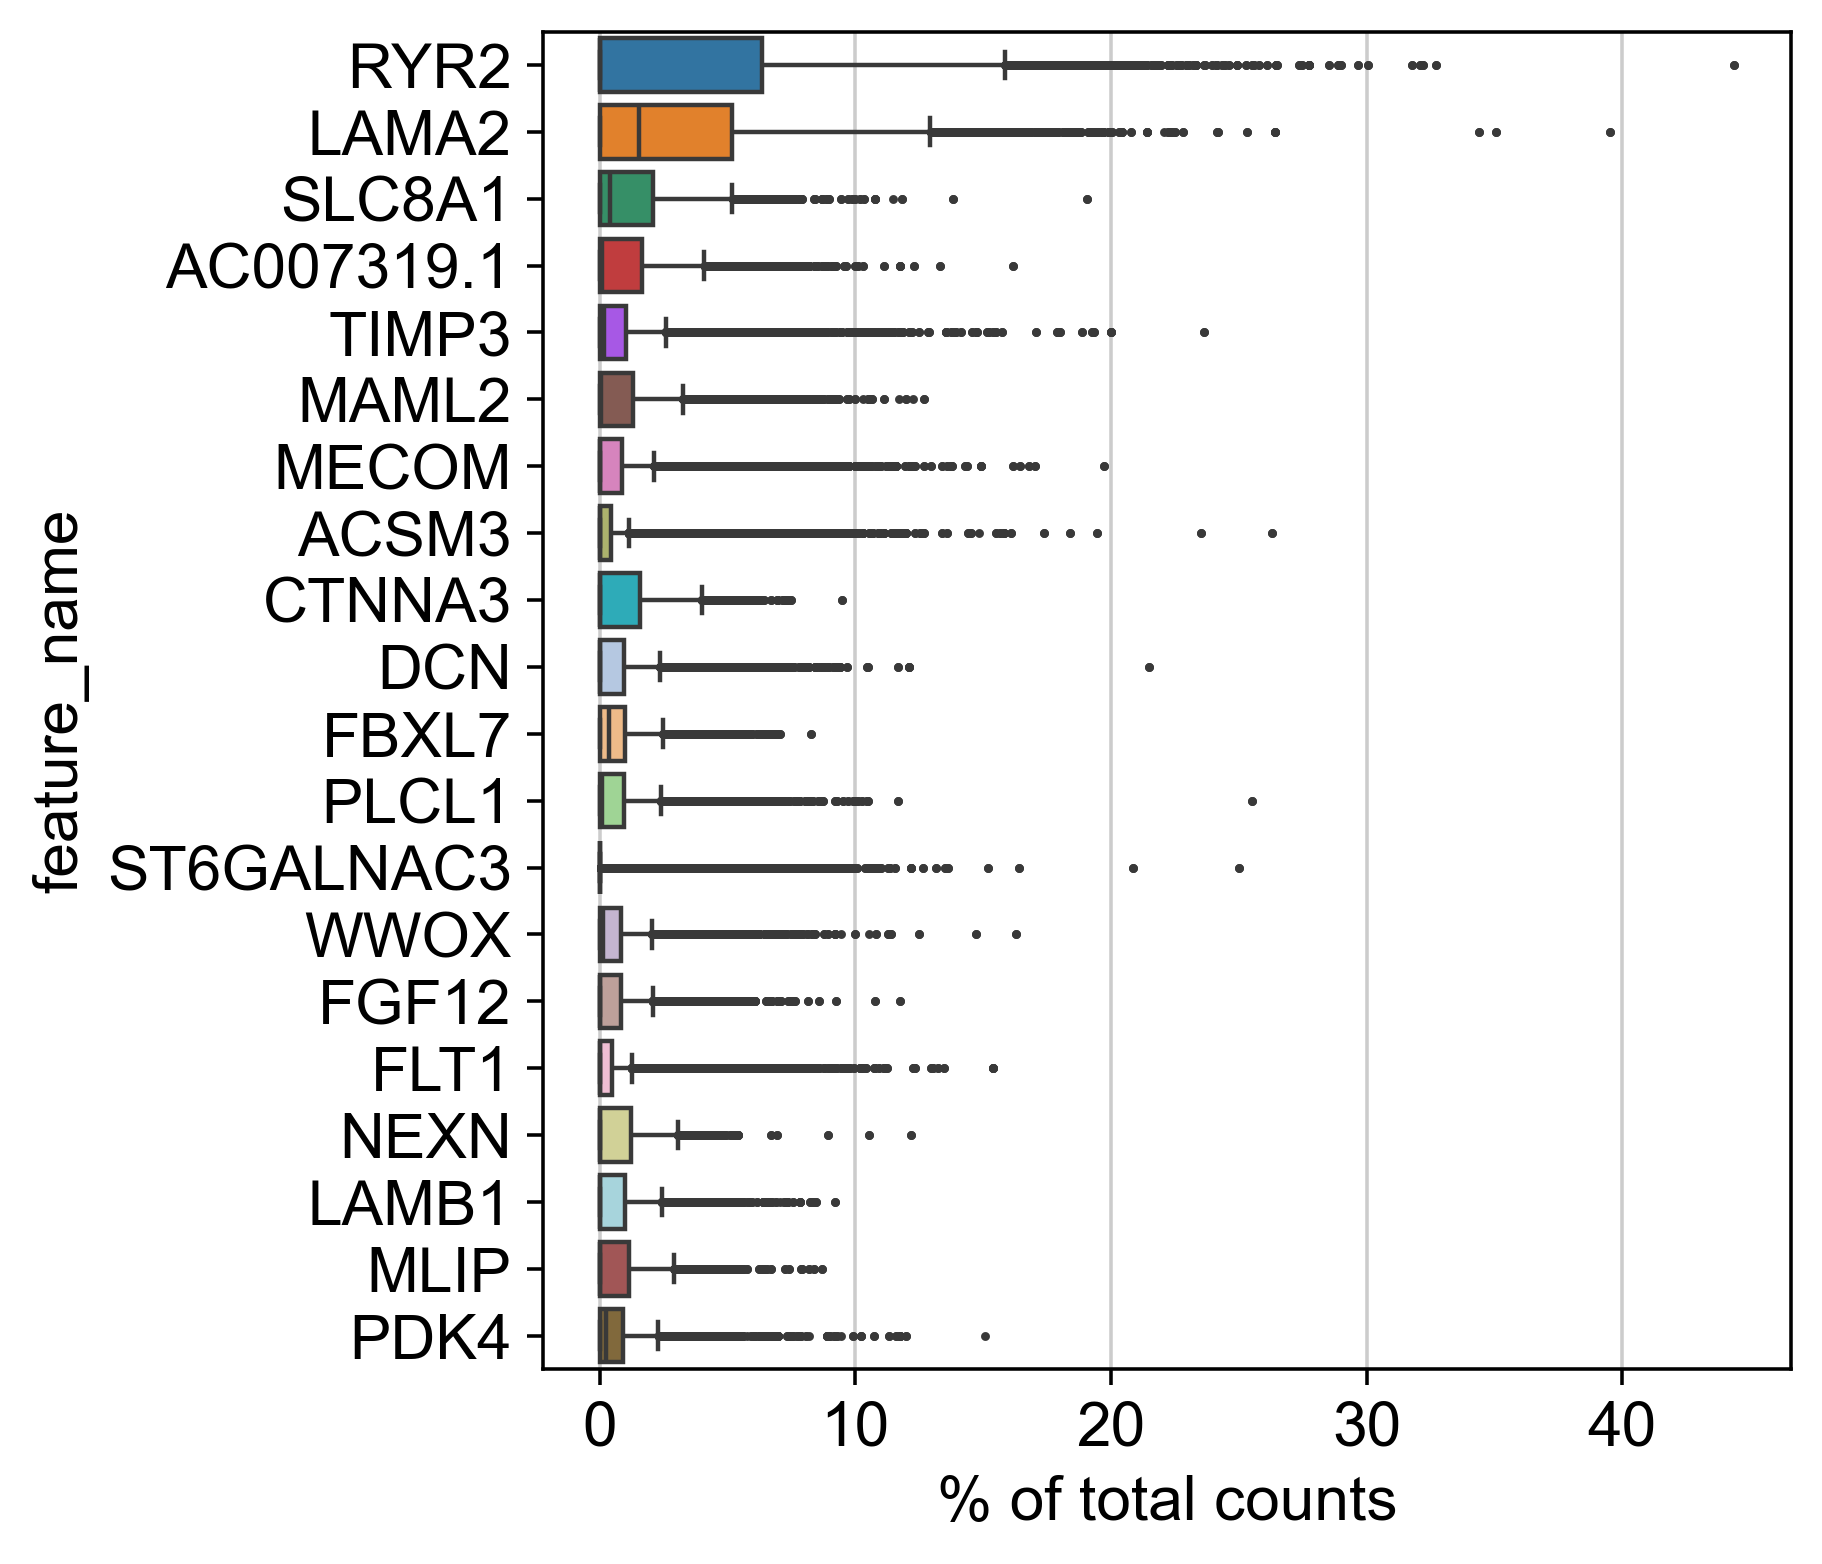

In [ ]:
# Define the disease conditions of interest
disease_conditions = [
    'normal', 
    'myocardial infarction', 
    'dilated cardiomyopathy', 
    'arrhythmogenic right ventricular cardiomyopathy', 
    'non-compaction cardiomyopathy'
]

# Iterate over each disease condition, subset the data, and plot highly expressed genes
for condition in disease_conditions:
    # Subset the AnnData object for the current disease condition
    condition_adata = heart_adata[heart_adata.obs['disease'] == condition].copy()

    # Plot the top highly expressed genes
    print (condition)
    sc.pl.highest_expr_genes(condition_adata, n_top=20, save=f"{condition}_all_heart.png")
    plt.show()


#### Steps
1. Define assays
2. Define attributes for mapping
3. Make a loop at assay level
4. Subset the AnnData object for the given assay type
5. Run Dimensonality reduction
6. Run UMAP
7. Make a loop in assay loop to make different plots for each attribute

In [20]:
# Define the disease conditions of interest
disease_conditions = [
    'normal', 
    'myocardial infarction', 
    'dilated cardiomyopathy', 
    'arrhythmogenic right ventricular cardiomyopathy', 
    'non-compaction cardiomyopathy'
]

# Define the attributes to plot
attributes = ['cell_type', 'assay', 'development_stage', 'tissue', 'sex']

# Iterate over each disease condition
for condition in disease_conditions:
    # Subset the AnnData object for the current disease condition
    condition_adata = heart_adata[heart_adata.obs['disease'] == condition].copy()
    
    # Perform PCA
    sc.tl.pca(condition_adata)
    
    # Compute the neighborhood graph
    sc.pp.neighbors(condition_adata)
    
    # Run UMAP
    sc.tl.umap(condition_adata)
    
    # Iterate over each attribute to plot
    for attribute in attributes:
        # Plot UMAP
        sc.pl.umap(condition_adata, color=attribute, title = f'UMAP - {condition} - {attribute.capitalize()}',save =f'UMAP - {condition} - {attribute.capitalize()}')


/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [9]:
# Define the disease conditions of interest
disease_conditions = [
    'normal', 
    'myocardial infarction', 
    'dilated cardiomyopathy', 
    'arrhythmogenic right ventricular cardiomyopathy', 
    'non-compaction cardiomyopathy'
]

# Iterate over each disease condition
for condition in disease_conditions:
    # Subset the AnnData object for the current disease condition
    condition_adata = heart_adata[heart_adata.obs['disease'] == condition].copy()
    
    # Save the AnnData object to a file
    condition_adata.write(f'data/{condition.replace(" ", "_")}_adata.h5ad')
    print(f'Saved {condition} data to {condition.replace(" ", "_")}_adata.h5ad')


Saved normal data to normal_adata.h5ad
Saved myocardial infarction data to myocardial_infarction_adata.h5ad
Saved dilated cardiomyopathy data to dilated_cardiomyopathy_adata.h5ad
Saved arrhythmogenic right ventricular cardiomyopathy data to arrhythmogenic_right_ventricular_cardiomyopathy_adata.h5ad
Saved non-compaction cardiomyopathy data to non-compaction_cardiomyopathy_adata.h5ad


In [11]:
# Define the attributes to plot
attributes = ['cell_type', 'assay', 'development_stage', 'tissue', 'sex']

# Iterate over each disease condition
for condition in disease_conditions:
    # Load the AnnData object from the file
    filename = f'data/{condition.replace(" ", "_")}_adata.h5ad'
    condition_adata = sc.read(filename)
    
    # Perform PCA
    sc.tl.pca(condition_adata)
    
    # Compute the neighborhood graph
    sc.pp.neighbors(condition_adata)
    
    # Run UMAP
    sc.tl.umap(condition_adata)
    
    # Iterate over each attribute to plot
    for attribute in attributes:
        # Plot UMAP
        sc.pl.umap(condition_adata, color=attribute, title = f'UMAP - {condition} - {attribute.capitalize()}', save = True)
        plt.title(f'UMAP - {condition} - {attribute.capitalize()}')
        plt.show()


computing PCA
    with n_comps=50
    finished (0:00:59)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:11)
computing UMAP


/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
